In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# read the csv in that contains the marriage/divorce info by county
file_marrige_pop = 'illinois_married_county.csv'

# create the DataFrame to hold the info and update the columns to floats so they can be plotted
marriage_pop_df = pd.read_csv(file_marrige_pop)
marriage_pop_df = marriage_pop_df.iloc[:,0:10]
marriage_pop_df['Total Population over 15'] = marriage_pop_df['Total Population over 15'].str.replace(",","").astype(float)
marriage_pop_df['Total population'] = marriage_pop_df['Total population'].str.replace(",","").astype(float)
marriage_pop_df = marriage_pop_df.fillna('0')

# create lists to hold the number of races, years, and counties to iterate over when plotting
races = marriage_pop_df['Race'].unique()
races = races[0:6]
years = marriage_pop_df['Year'].astype('int64').unique()
years = years[0:9]
counties = marriage_pop_df['County'].unique()
counties = counties[0:10]
marriage_pop_df

,Year,County,Race,Total Population over 15,Percent Married,Total population,Percent of population,Number Married,Percent Divorced,Number Divorced
0,2017,Cook,White,2481185.0,47.40%,3072581.0,58.70%,1456403,8.50%,261169
1,2017,Cook,Black or African American,996533.0,23.40%,1291839.0,24.70%,302290,11.50%,148561
2,2017,Cook,American Indian and Alaska Native,11353.0,42.20%,38651.0,0.70%,16310,11.50%,4444
3,2017,Cook,Asian,309994.0,58.00%,414671.0,7.90%,240509,4.10%,17001
4,2017,Cook,Native Hawaiian and Other Pacific Islander,1433.0,36.80%,5810.0,0.10%,2138,7.50%,435
5,2017,Cook,Some other race,380164.0,44.10%,555781.0,10.60%,245099,6.10%,33902
6,2016,Cook,White,2476090.0,47.30%,3065802.0,58.60%,1450124,8.60%,263658
7,2016,Cook,Black or African American,998676.0,23.50%,1298336.0,24.80%,305108,11.40%,148010
8,2016,Cook,American Indian and Alaska Native,11411.0,42.50%,38514.0,0.70%,16368,11.40%,4390
9,2016,Cook,Asian,301369.0,58.10%,401840.0,7.70%,233469,4.20%,16877


In [11]:
# created a groupby to look at the data as a quick test
marriage_pop_grouped = marriage_pop_df.iloc[:,0:7]
marriage_pop_grouped = marriage_pop_grouped.groupby(['County','Race','Year'])


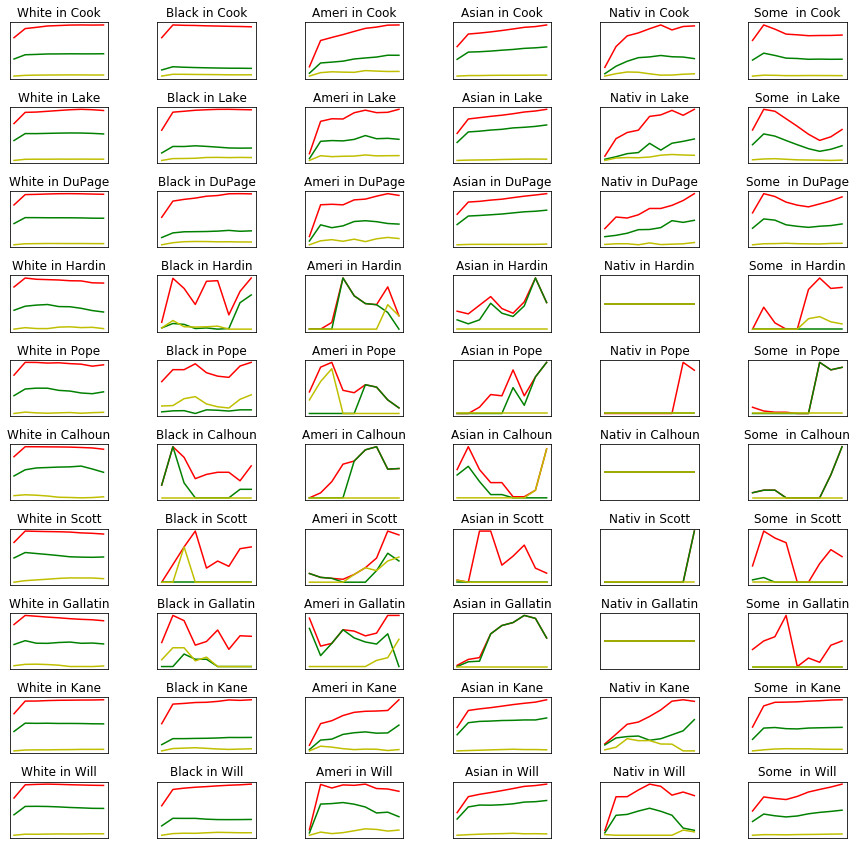

In [12]:
# compare the total population, total divorced, and total married by county and race

fig, ax = plt.subplots(10,6)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(hspace = .5, wspace=.5)
num = 1

# create a row of 6 graphs for each county broken out by race

for county in counties:
    for race in races:

        race_married = marriage_pop_df.loc[(marriage_pop_df['Race']==race) & \
                                           (marriage_pop_df['County']==county),'Number Married']
        race_pop = marriage_pop_df.loc[(marriage_pop_df['Race']==race) & \
                                       (marriage_pop_df['County']==county),'Total population']
        year = marriage_pop_df.loc[(marriage_pop_df['Race']==race) & \
                                       (marriage_pop_df['County']==county),'Year']
        race_divorced = marriage_pop_df.loc[(marriage_pop_df['Race']==race) & \
                                       (marriage_pop_df['County']==county),'Number Divorced']
        ax=plt.subplot(10,6,num)
        
#       hide the tick marks so the graphs aren't too busy
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax.plot(year, race_pop,color='r')
        ax.plot(year, race_married,color='g')
        ax.plot(year, race_divorced,color='y')
        ax.set_title(f"{race[0:5]} in {county}")

#       increment the index used to indicate where the subplot should be made
        num = num + 1

Here's the interesting stuff we found. This is what I would want to know in order to do further analysis.

Get the percent/number married per county. Find the percent/number of marraiages per county broken down by race, median income, age

ANOVA 